<a href="https://colab.research.google.com/github/bioai96/SKTFLYAI/blob/main/DL/%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%96%B4%ED%85%90%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LSTM+CNN 영화리뷰 분류하기 with Attention


In [1]:
!pip install attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from attention import Attention
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(x_train,y_train),(x_test, y_test) = imdb.load_data(num_words=500)

#단어의 수를 맞추기
x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)
# 클래스가 긍정 또는 부정 두 가지뿐이라 원-핫 인코딩 과정이 없다

17473536/17464789 [==============================] - 0s 0us/step


In [5]:
#모델 구조 설정
model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 lstm (LSTM)                 (None, None, 64)          42240     
                                                                 
 attention (Attention)       (None, 128)               20480     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
 activation (Activation)     (None, 1)                

In [6]:
#모델의 실행 옵션
model.compile(loss='binary_crossentropy',optimizer = 'adam', # 0과 1
              metrics = ['accuracy'])

#학습의 조기 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=3)

#모델 실행
history = model.fit(x_train, y_train, batch_size=40, epochs = 100,
                    validation_split=0.25, callbacks=[early_stopping_callback])

Epoch 1/100
469/469 [==============================] - 19s 27ms/step - loss: 0.5117 - accuracy: 0.7313 - val_loss: 0.4305 - val_accuracy: 0.7990
Epoch 2/100
469/469 [==============================] - 12s 26ms/step - loss: 0.3874 - accuracy: 0.8305 - val_loss: 0.3682 - val_accuracy: 0.8346
Epoch 3/100
469/469 [==============================] - 12s 26ms/step - loss: 0.3594 - accuracy: 0.8440 - val_loss: 0.3774 - val_accuracy: 0.8336
Epoch 4/100
469/469 [==============================] - 12s 26ms/step - loss: 0.3446 - accuracy: 0.8498 - val_loss: 0.3672 - val_accuracy: 0.8326
Epoch 5/100
469/469 [==============================] - 13s 27ms/step - loss: 0.3328 - accuracy: 0.8569 - val_loss: 0.3646 - val_accuracy: 0.8392
Epoch 6/100
469/469 [==============================] - 12s 26ms/step - loss: 0.3239 - accuracy: 0.8606 - val_loss: 0.3486 - val_accuracy: 0.8459
Epoch 7/100
469/469 [==============================] - 12s 26ms/step - loss: 0.3165 - accuracy: 0.8616 - val_loss: 0.3682 - val_ac

In [7]:
#정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

782/782 [==============================] - 8s 10ms/step - loss: 0.3333 - accuracy: 0.8543

 Test Accuracy: 0.8543


In [8]:
#학습셋과 테스트셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

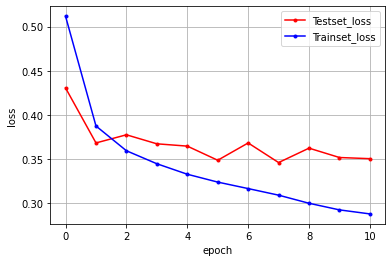

In [9]:
#그래프로 표현해 보자
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss,marker='.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker='.', c = 'blue',label = 'Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()